In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
file_dataset = "./CSV/df_processed_polarity_and_satisfaction.csv"
processed_text_file = './CSV/processed_text.csv'

In [ ]:
df = pd.read_csv(file_dataset)

In [32]:
df.head()

,_id,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductURL,Year,Month,Day,Polarity,Customer_Satisfied
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,https://www.amazon.com/dp/B001E4KFG0,2011,4,27,0.9441,1
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,https://www.amazon.com/dp/B000LQOCH0,2008,8,18,0.8265,1
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,https://www.amazon.com/dp/B000UA0QIQ,2011,6,13,0.0000,0
3,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,https://www.amazon.com/dp/B00813GRG4,2012,9,7,-0.5664,0
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,https://www.amazon.com/dp/B006K2ZZ7K,2012,10,21,0.9468,1


## EXPLORATORY ANALYSIS: Conduct EDA to understand the dataset's characteristics:

Sentiment Distribution: How many reviews are positive, neutral, and negative?

Score Distribution: What is the average score? How do scores distribute?

Review Volume Over Time: Any trends in review counts over time?

Reviewer Engagement: Identify top reviewers and their impact.

There are 74256 unique products in the dataset.


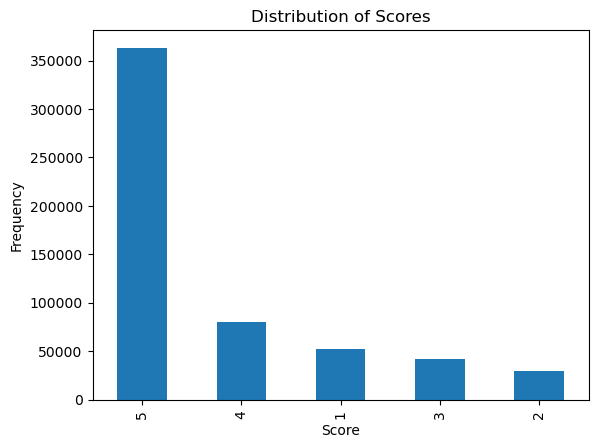

In [33]:
num_unique_products = df['ProductId'].nunique()
print(f'There are {num_unique_products} unique products in the dataset.')

df['Score'].value_counts().plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [36]:
#Read the polarity dataframe from the csv file
# polarity_dataframe = pd.read_csv(polarity_file)

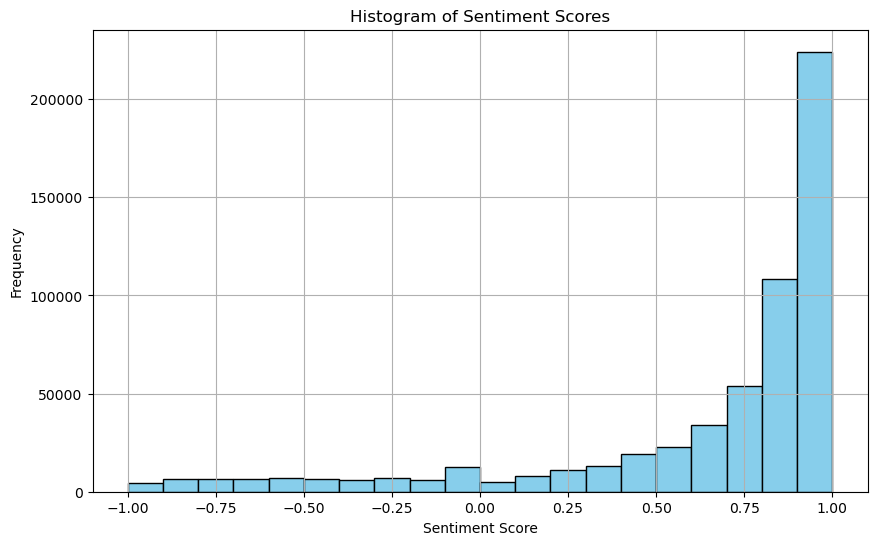

In [37]:
#Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## QUANTITATIVE ANALYSIS

In [38]:
from scipy import stats
import seaborn as sns

In [39]:
#Convert 'Time' to datetime, create a 'Review_Length' column, and append the polarity column
df['Time'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str))
df['Review Length'] = df['Text'].apply(len)
# df = pd.concat([df, df["Polarity"]], axis=1)

In [40]:
df.head()

,_id,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductURL,Year,Month,Day,Polarity,Customer_Satisfied,Review Length
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,https://www.amazon.com/dp/B001E4KFG0,2011,4,27,0.9441,1,263
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,https://www.amazon.com/dp/B000LQOCH0,2008,8,18,0.8265,1,509
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,https://www.amazon.com/dp/B000UA0QIQ,2011,6,13,0.0000,0,219
3,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,https://www.amazon.com/dp/B00813GRG4,2012,9,7,-0.5664,0,190
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,https://www.amazon.com/dp/B006K2ZZ7K,2012,10,21,0.9468,1,140


Descriptive Statistics for Scores:
count    568377.000000
mean          4.183273
std           1.310394
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Descriptive Statistics for Sentiment:
count    568377.000000
mean          0.647348
std           0.466238
min          -0.999400
25%           0.576600
50%           0.854600
75%           0.942100
max           0.999900
Name: Polarity, dtype: float64


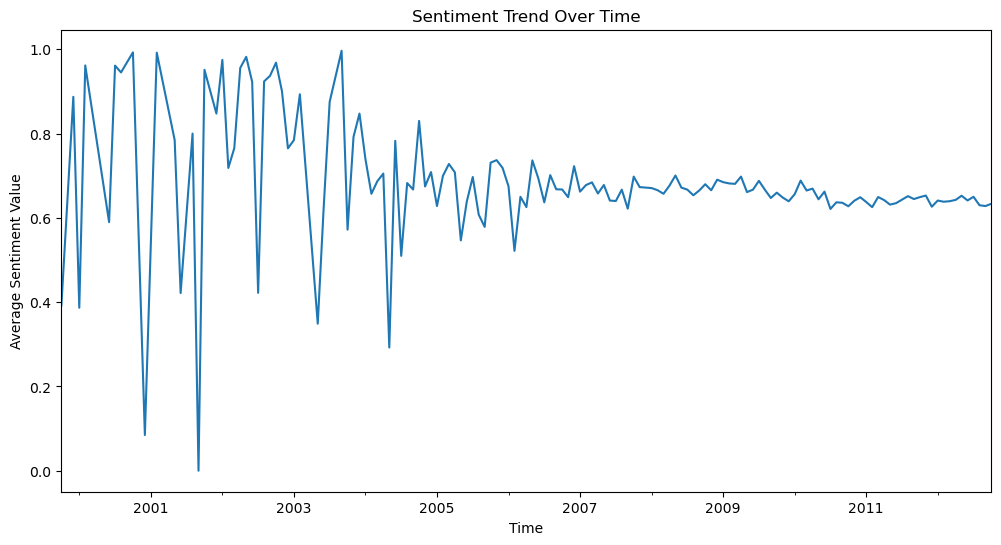


Correlation Matrix:
                  Score  Polarity  Review Length
Score          1.000000  0.490516      -0.077376
Polarity       0.490516  1.000000       0.113464
Review Length -0.077376  0.113464       1.000000


In [41]:
#Descriptive Statistics
print("Descriptive Statistics for Scores:")
print(df['Score'].describe())

print("\nDescriptive Statistics for Sentiment:")
print(df['Polarity'].describe())

#Trend Analysis
#Analyze trends by month and year
df['YearMonth'] = df['Time'].dt.to_period('M')
monthly_polarity = df.groupby('YearMonth')['Polarity'].mean()
monthly_scores = df.groupby('YearMonth')['Score'].mean()

plt.figure(figsize=(12, 6))
monthly_polarity.plot(title='Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Value')
plt.show()

#Correlation Analysis
correlation_matrix = df[['Score', 'Polarity', 'Review Length']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


In [42]:
#Define score segments based on thresholds
def score_segment(score):
  if score >= 4:
    return 'High'
  elif score >= 2:
    return 'Medium'
  else:
    return 'Low'

In [43]:
#Define polarity segments based on thresholds
def polarity_segment(polarity):
  if polarity > 0.35:
    return 'Positive'
  elif polarity > -0.35:
    return 'Neutral'
  else:
    return 'Negative'

In [44]:
#Apply the segmentation function to the 'Score' column
df['Score Segment'] = df['Score'].apply(score_segment)

In [45]:
#Apply the segmentation function to the 'Polarity' column
df['Polarity Segment'] = dataset['Polarity'].apply(polarity_segment)

In [46]:
dataset['Time']

0         2011-04-27
1         2008-08-18
2         2011-06-13
3         2012-09-07
4         2012-10-21
             ...    
568372    2012-02-21
568373    2012-03-09
568374    2012-03-13
568375    2012-05-31
568376    2011-03-09
Name: Time, Length: 568377, dtype: object

In [47]:
#Sort the dataset by the 'Time' column
dataset_sorted = df.sort_values('Time')

In [48]:
#Group by 'Score Segment' and 'Date' and get the average of scores over time
segmented_trends_score = dataset_sorted.groupby(['Score Segment', pd.Grouper(key='Time', freq='M')]).agg(
    {'Score': 'mean',
     'Polarity': 'mean'
    }).reset_index()

In [49]:
#Group by 'Polarity Segment' and 'Date' and get the average of scores over time
segmented_trends_polarity = dataset_sorted.groupby(['Polarity Segment', pd.Grouper(key='Time', freq='M')]).agg(
    {'Score': 'mean',
    'Polarity': 'mean'
    }).reset_index()

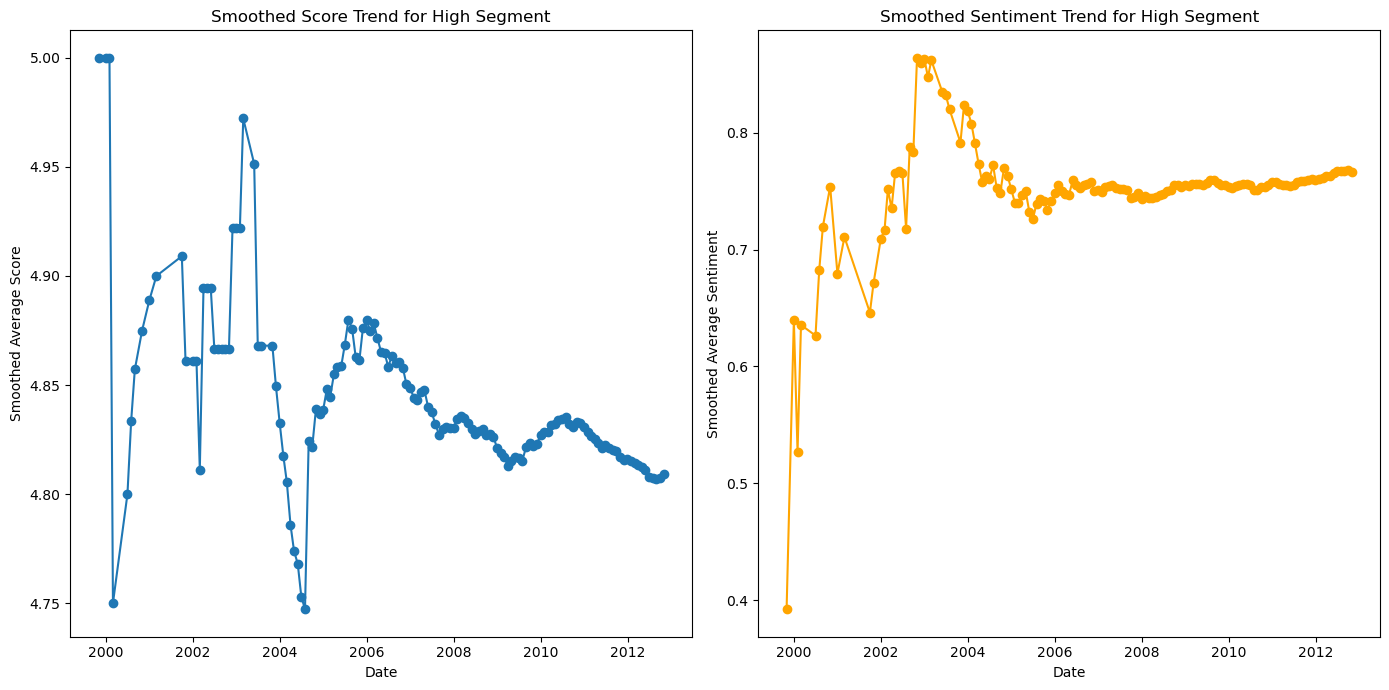

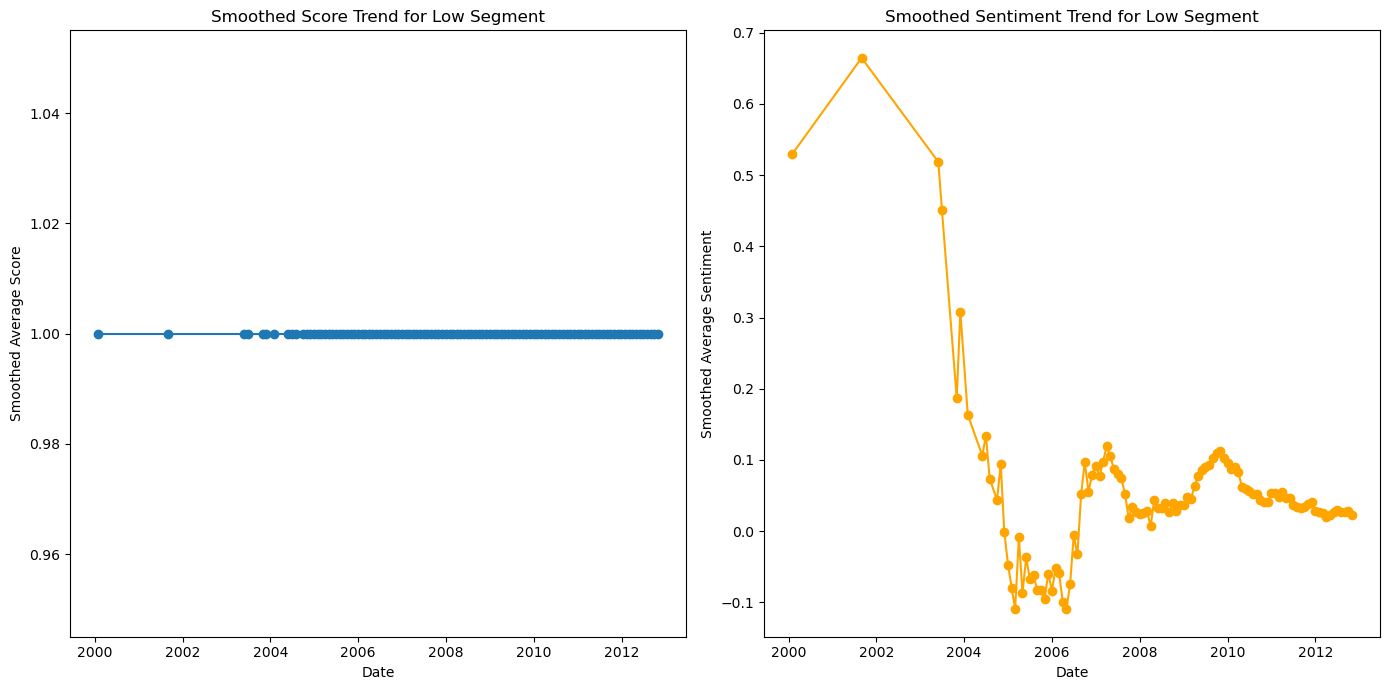

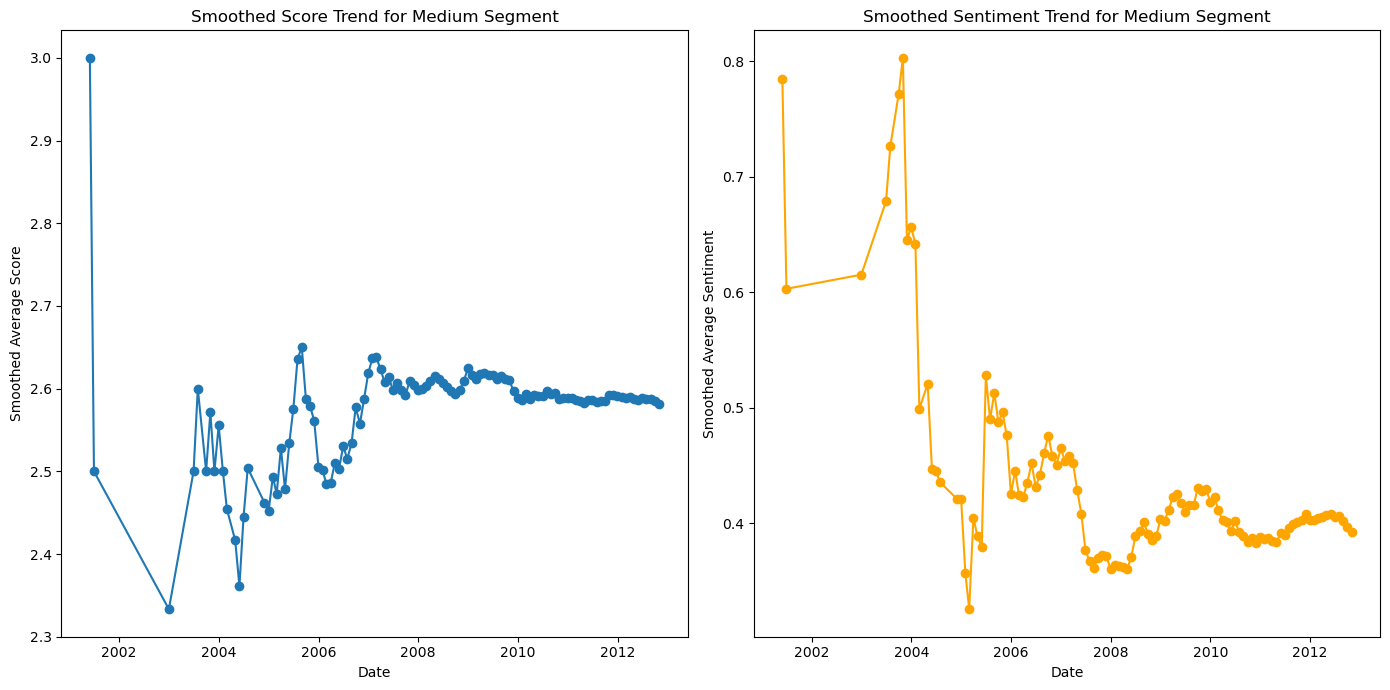

In [50]:
#By Score Segment

#Define rolling window size
rolling_window_size = 12  #12 months for a yearly trend

#Plot the trends with smoothing for each score segment
for segment in segmented_trends_score['Score Segment'].unique():
    segment_data = segmented_trends_score[segmented_trends_score['Score Segment'] == segment].copy()

    # Calculate rolling mean
    segment_data['Rolling Mean Score'] = segment_data['Score'].rolling(window=rolling_window_size, min_periods=1).mean()
    segment_data['Rolling Mean Polarity'] = segment_data['Polarity'].rolling(window=rolling_window_size, min_periods=1).mean()

    plt.figure(figsize=(14, 7))

    #Score trend with rolling mean
    plt.subplot(1, 2, 1)
    plt.plot(segment_data['Time'], segment_data['Rolling Mean Score'], marker='o')
    plt.title(f'Smoothed Score Trend for {segment} Segment')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Average Score')

    #Polarity trend with rolling mean
    plt.subplot(1, 2, 2)
    plt.plot(segment_data['Time'], segment_data['Rolling Mean Polarity'], marker='o', color='orange')
    plt.title(f'Smoothed Sentiment Trend for {segment} Segment')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Average Sentiment')

    plt.tight_layout()
    plt.show()

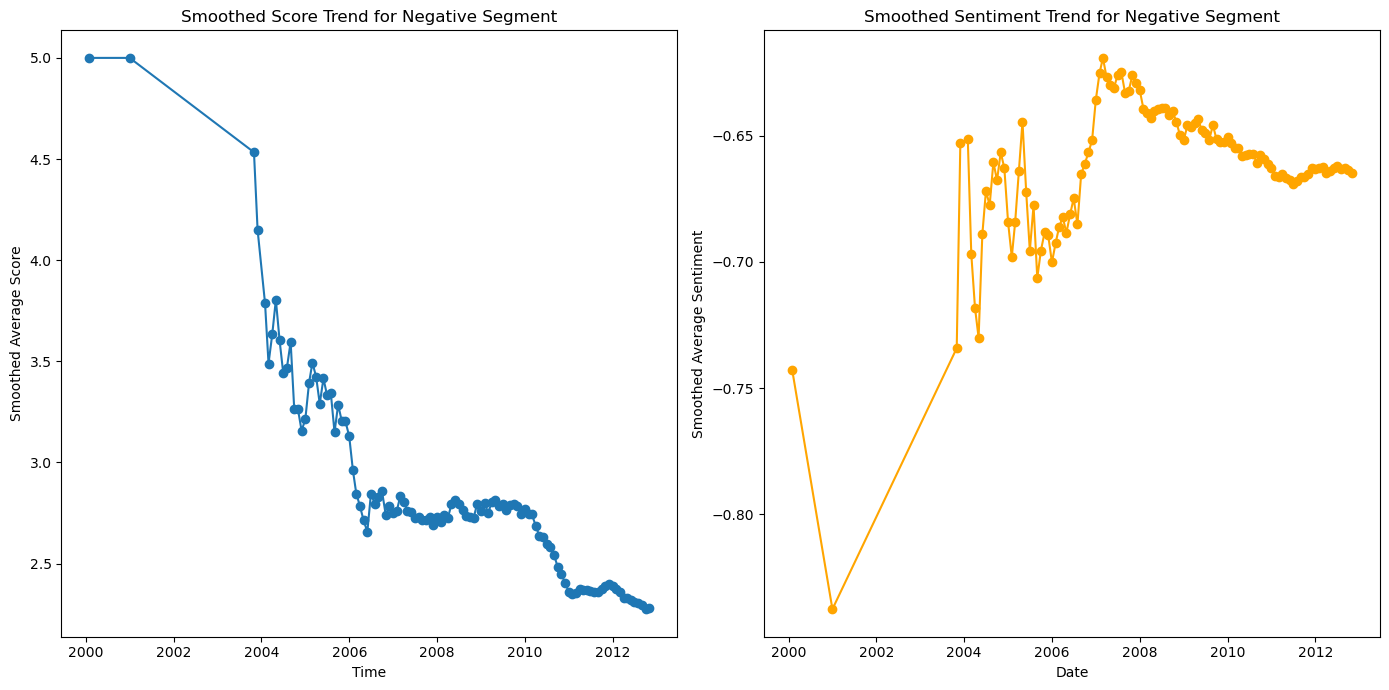

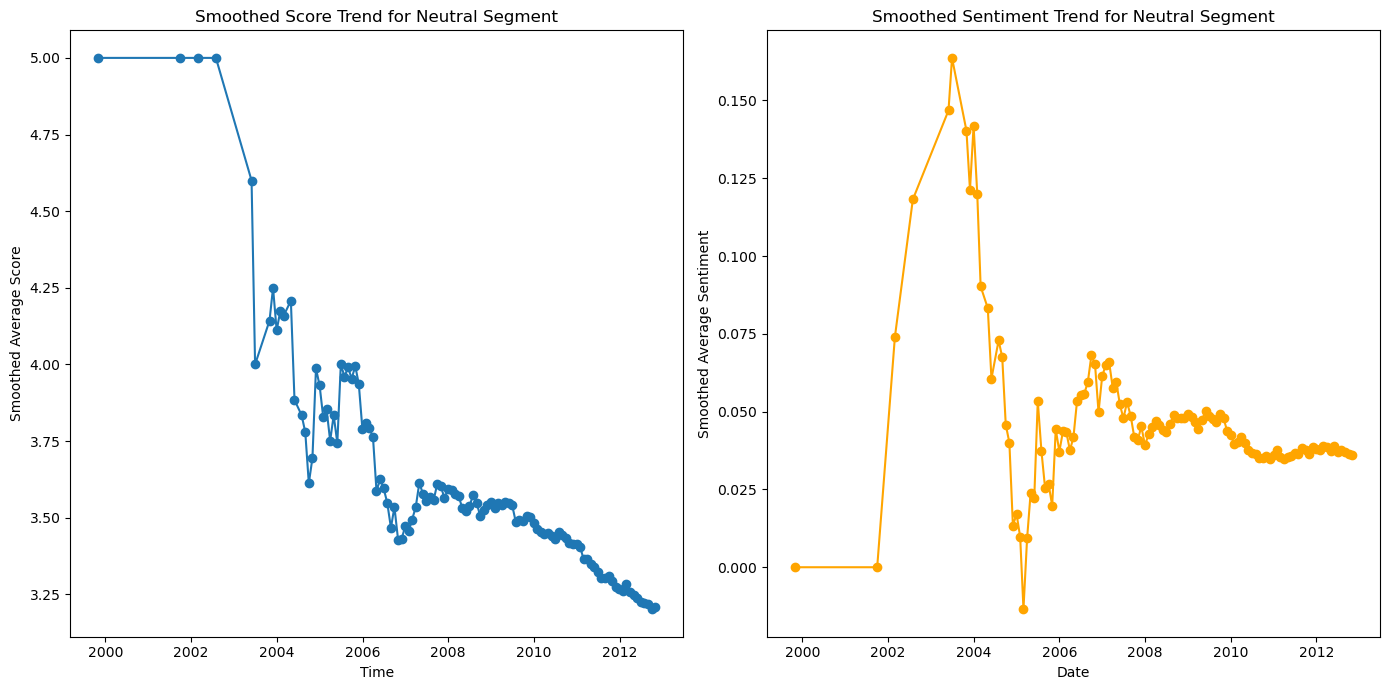

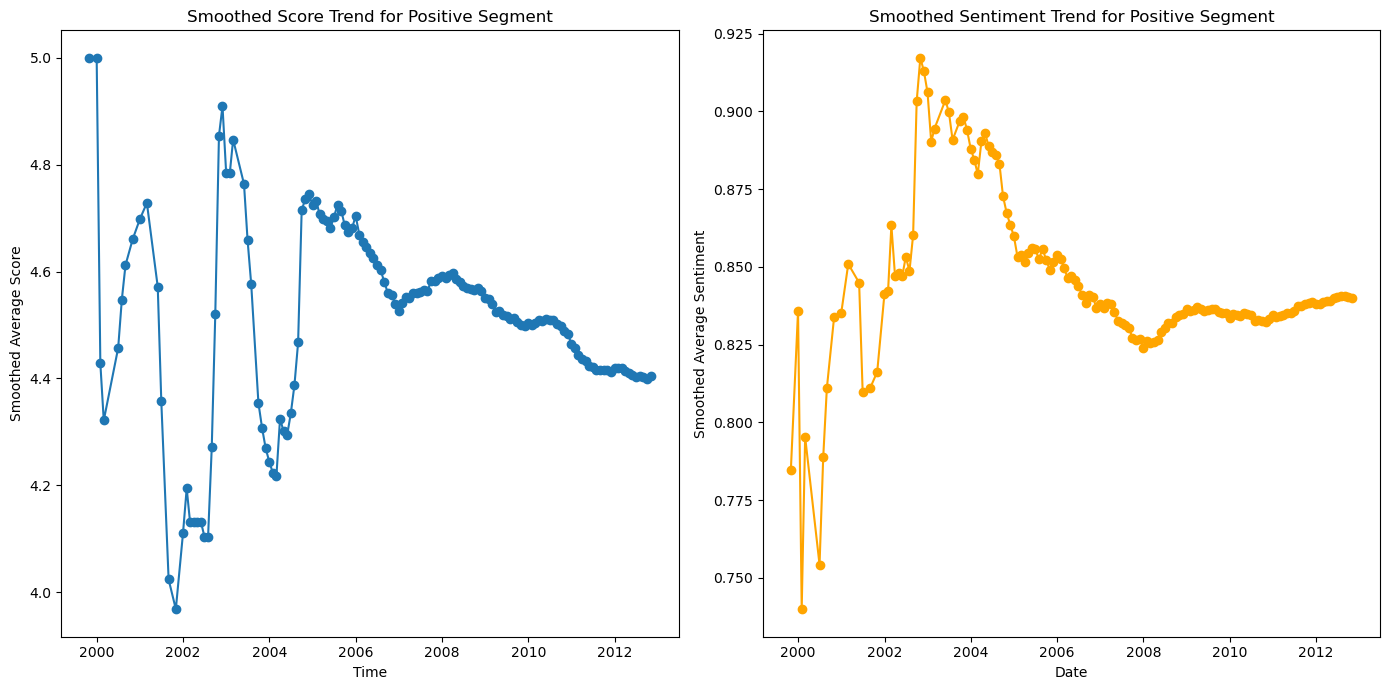

In [51]:
#By Polarity Segment

#Define rolling window size
rolling_window_size = 12  #12 months for a yearly trend

#Plot the trends with smoothing for each score segment
for segment in segmented_trends_polarity['Polarity Segment'].unique():
    segment_data = segmented_trends_polarity[segmented_trends_polarity['Polarity Segment'] == segment].copy()

    # Calculate rolling mean
    segment_data['Rolling Mean Score'] = segment_data['Score'].rolling(window=rolling_window_size, min_periods=1).mean()
    segment_data['Rolling Mean Polarity'] = segment_data['Polarity'].rolling(window=rolling_window_size, min_periods=1).mean()

    plt.figure(figsize=(14, 7))

    #Score trend with rolling mean
    plt.subplot(1, 2, 1)
    plt.plot(segment_data['Time'], segment_data['Rolling Mean Score'], marker='o')
    plt.title(f'Smoothed Score Trend for {segment} Segment')
    plt.xlabel('Time')
    plt.ylabel('Smoothed Average Score')

    #Polarity trend with rolling mean
    plt.subplot(1, 2, 2)
    plt.plot(segment_data['Time'], segment_data['Rolling Mean Polarity'], marker='o', color='orange')
    plt.title(f'Smoothed Sentiment Trend for {segment} Segment')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Average Sentiment')

    plt.tight_layout()
    plt.show()

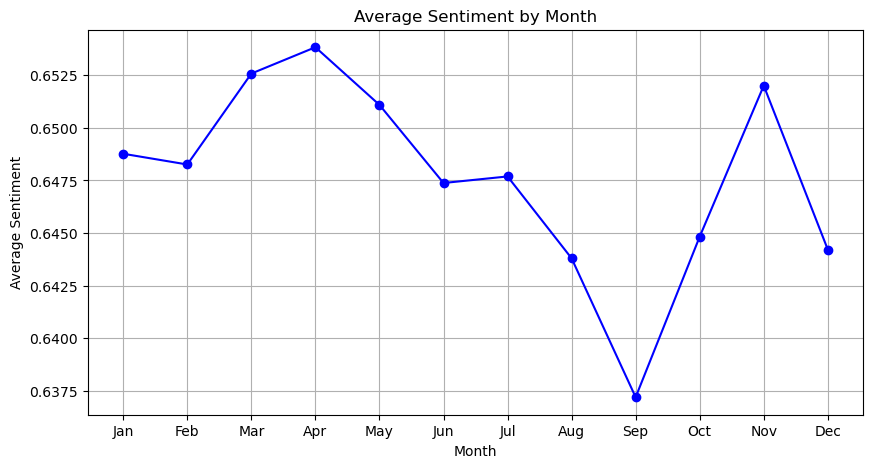

Marketing Strategy Recommendations:
Consider intensifying marketing efforts during 4, 3, 11 when customer sentiment is highest.


In [52]:
#Calculating the average polarity for each month
monthly_polarity = df.groupby('Month')['Polarity'].mean()

#Plot seasonal trends
plt.figure(figsize=(10, 5))
monthly_polarity.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#Suggestion for marketing strategy adjustment
print("Marketing Strategy Recommendations:")
peak_months = monthly_polarity.nlargest(3).index.tolist()
print(f"Consider intensifying marketing efforts during {', '.join(map(str, peak_months))} when customer sentiment is highest.")

In [53]:
#Sample 10 poducts for each score segment
unique_products = df.drop_duplicates(subset='ProductId')
min_count = 10
segments = unique_products['Score Segment'].value_counts()
segments_to_sample = segments[segments >= min_count]

In [54]:
#Sample approximately 10 products from each segment
sampled_products_by_segment = {}
for segment in segments_to_sample.index:
    sampled_products = unique_products[unique_products['Score Segment'] == segment].sample(n=min_count, random_state=1)
    sampled_products_by_segment[segment] = sampled_products['ProductId'].tolist()

In [55]:
#lists of product IDs in a vertical list
for segment, products in sampled_products_by_segment.items():
    print(f"{segment} Segment Products:")
    for product in products:
        print(product)
    print("\n")

High Segment Products:
B000LKYQGS
B005GWY4JU
B001ET63XO
B005JZZ54W
B004YKR2X0
B004VLVLQQ
B000FDDFUE
B0011DM1RK
B000EX5KLW
B0046HHNY4


Medium Segment Products:
B001KQI08C
B004SFF28S
B000GAZPY0
B000RHVJA6
B000UOFW9K
B003IM0B8S
B000NZVYF2
B007WP403O
B0028JSUB2
B000E5DJYU


Low Segment Products:
B000LRH5FK
B000J2Q1P2
B000IEC6X2
B000LQJK2W
B000JMDHD6
B000VBSFLY
B005GX7WRU
B005LKRCSM
B001CCXVPQ
B000QB316S




In [58]:
#Read Preprocessed Text Data
df_processed_text = pd.read_csv(processed_text_file)

In [59]:
df_processed_text

,Id,Processed Text
0,1,bought several vitality canned dog food produc...
1,3,confection around centuries light pillowy citr...
2,4,looking secret ingredient robitussin believe f...
3,2,product arrived labeled jumbo salted peanuts p...
4,5,great taffy great price wide assortment yummy ...
...,...,...
568372,568452,stars small give one training session tried ...
568373,568451,disappointed flavor chocolate notes especially...
568374,568453,best treats training rewarding dog good groomi...
568375,568454,satisfied product advertised use cereal raw vi...


In [60]:
#Add the processed text column to the dataset
df = pd.concat([df, df_processed_text["Processed Text"]], axis=1)

In [61]:
df

,_id,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,Year,Month,Day,Polarity,Customer_Satisfied,Review Length,YearMonth,Score Segment,Polarity Segment,Processed Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,...,2011,4,27,0.9441,1,263,2011-04,High,Positive,bought several vitality canned dog food produc...
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",...,2008,8,18,0.8265,1,509,2008-08,High,Positive,confection around centuries light pillowy citr...
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,...,2011,6,13,0.0000,0,219,2011-06,Medium,Neutral,looking secret ingredient robitussin believe f...
3,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,...,2012,9,7,-0.5664,0,190,2012-09,Low,Negative,product arrived labeled jumbo salted peanuts p...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,...,2012,10,21,0.9468,1,140,2012-10,High,Positive,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568372,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,...,2012,2,21,0.4352,1,372,2012-02,High,Positive,stars small give one training session tried ...
568373,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,...,2012,3,9,-0.4848,0,252,2012-03,Medium,Negative,disappointed flavor chocolate notes especially...
568374,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,...,2012,3,13,0.9717,1,200,2012-03,High,Positive,best treats training rewarding dog good groomi...
568375,568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,2012-05-31,Great Honey,...,2012,5,31,0.4754,1,111,2012-05,High,Positive,satisfied product advertised use cereal raw vi...


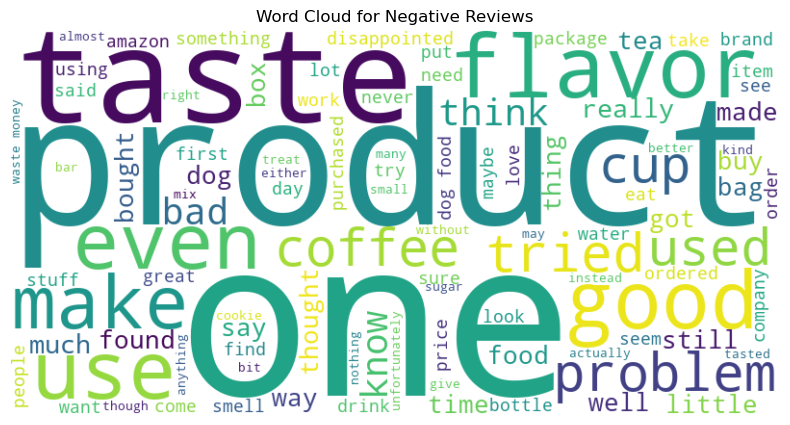

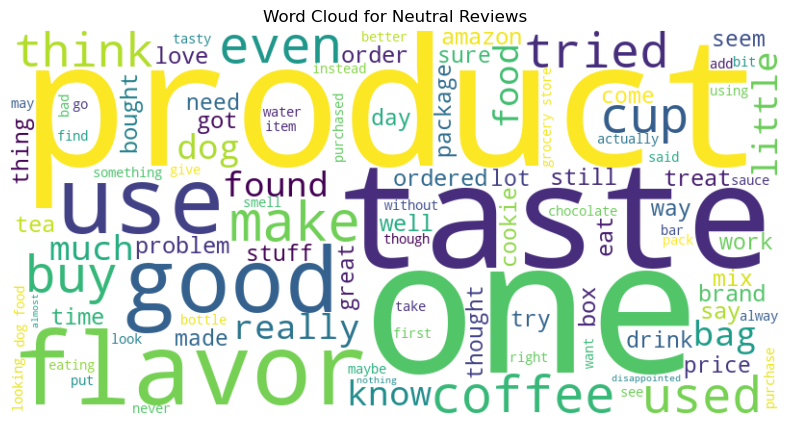

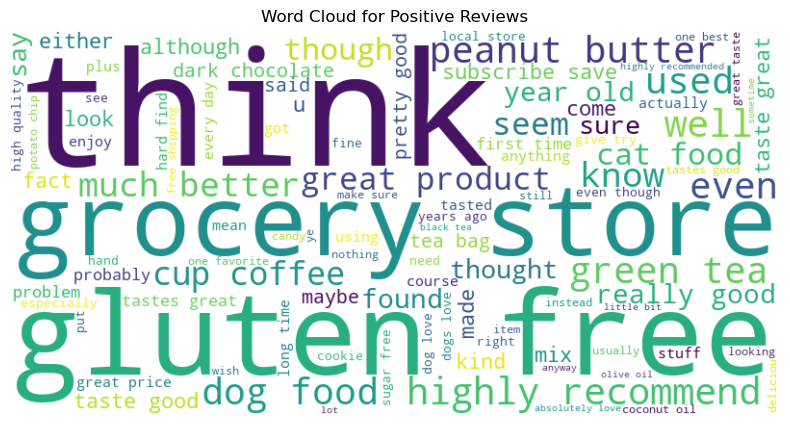

In [63]:
from wordcloud import WordCloud, STOPWORDS

#Word Cloud Per Polarity Segment
score_labels = ['Negative', 'Neutral', 'Positive']

#Function to generate word cloud for each segment
def generate_word_cloud(segment_name, data):
    segment_data = data[data['Polarity Segment'] == segment_name]
    text = " ".join(review for review in segment_data['Processed Text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=800, height=400).generate(text)

    #Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {segment_name} Reviews')
    plt.show()

#Generate word clouds for each segment
for segment in score_labels:
    generate_word_cloud(segment, df)